In [80]:
execfile('../src/display_utils.py')
execfile('../src/moldev_utils.py')
%matplotlib inline

In [56]:
summary = pd.read_csv('../output/condition_summary.csv')

In [57]:
colors = {'Blue & Red':'bwr','Blue':'Blues'}

# How do conditions cluster together?

In [58]:
data = pipe(summary,
            get_means,
            lambda df: df.set_index('Condition'),
            normalize_columns)

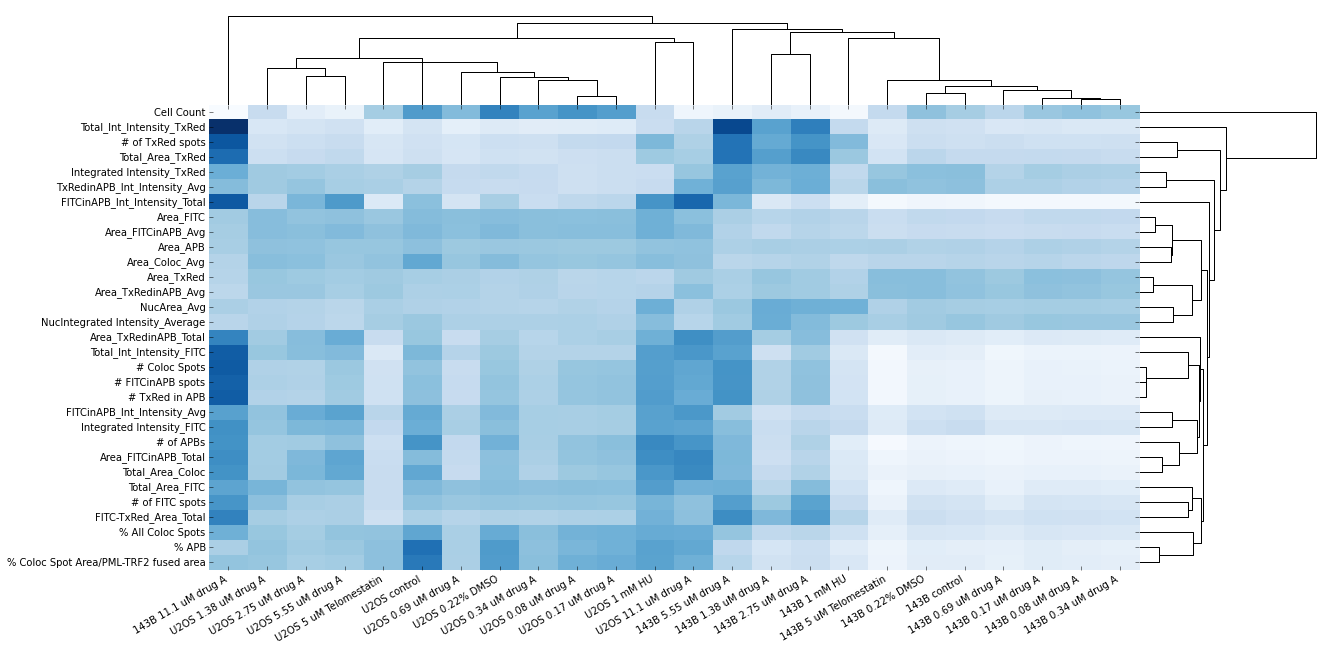

In [59]:
interact(matrix_tree, data = fixed(data), color = colors);

# Heatmap subsets

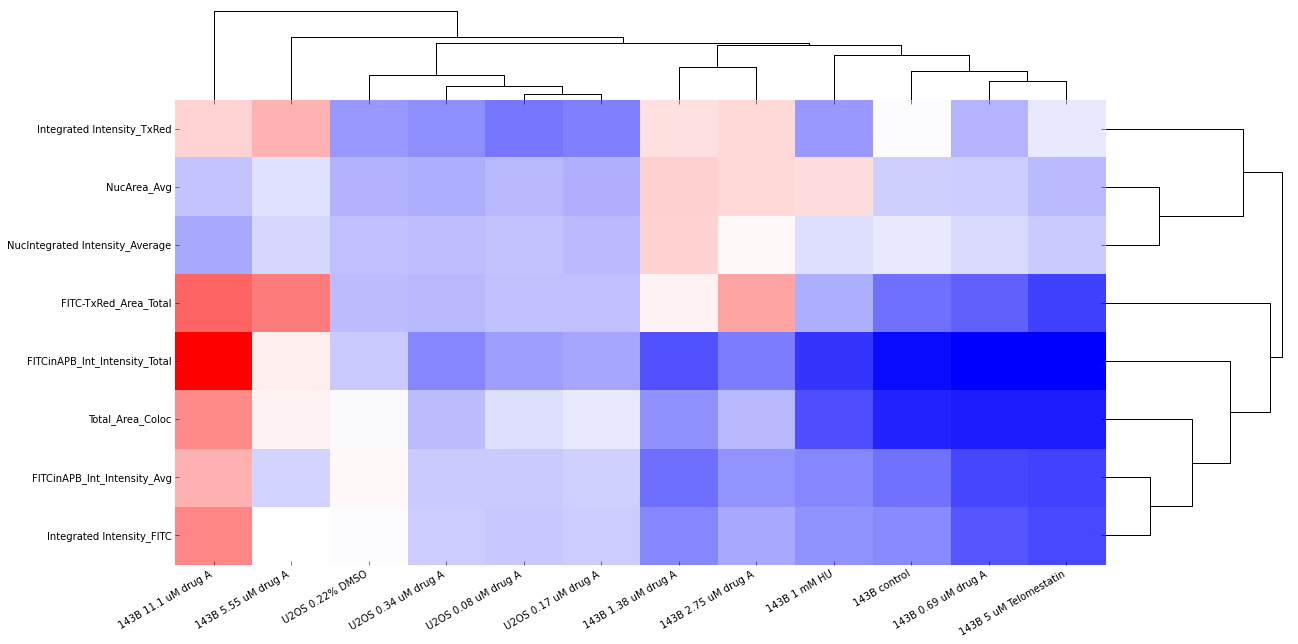

In [60]:
def wrapper(conditions,features,color):
    df = data.loc[list(conditions)][list(features)]
    try: 
        matrix_tree(df,color)
    except:
        print "\n".join(["-"*50, "Please select multiple features and conditions.","-"*50])

subset = interactive(wrapper,
                     conditions = widgets.SelectMultiple(options = data.index.values.tolist(),height = 300),
                     features = widgets.SelectMultiple(options = data.columns.values.tolist(),height = 300),
                     color = colors)
subset

# How do parameters vary with drug dose?

In [61]:
dose_data = thread_first(summary,
                        lambda df: df[df['Function'] == 'mean'],
                        add_condition_cols)

dose_error = thread_first(summary,
                        lambda df: df[df['Function'] == 'sem'],
                        add_condition_cols)

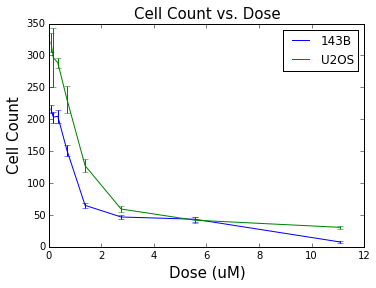

In [62]:
interact(dose_plot,
         scale = widgets.ToggleButtons(options=['linear','log']), 
         df = fixed(dose_data),
         err = fixed(dose_error),
         cols = widgets.SelectMultiple(value = ['Cell Count'],
                              options= [col for col in dose_data.columns.values.tolist() if col not in ['Condition','Function','Base','Dose','Unit','Drug']],
                              height=250));

#How are different parameters related?

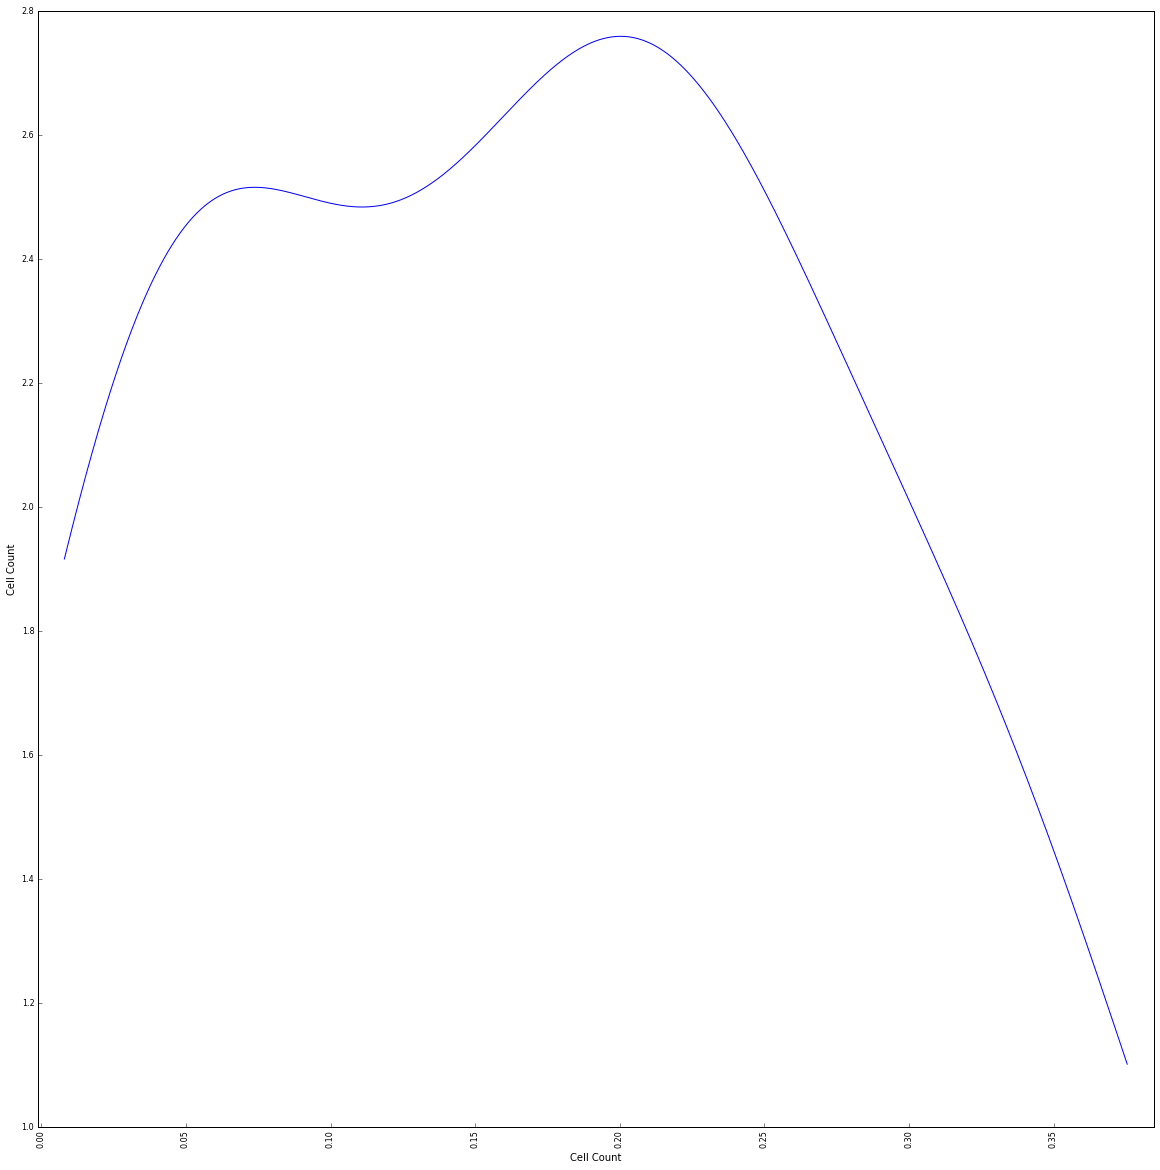

In [63]:
from pandas.tools.plotting import scatter_matrix

def scatter(df,cols):
    scatter_matrix(data[list(cols)], alpha=1, figsize=(20, 20), diagonal='kde');
    
interact(scatter, 
         df = fixed(filter_rows(dose_data,'Base','143B')),
         cols = widgets.SelectMultiple(value = ['Cell Count'],
                              options= [col for col in data.columns.values.tolist() if col not in ['Condition','Function','Base','Dose','Unit','Drug']],
                              height=250));

# Parameter vs. Conditions

In [64]:
raw_cell_data = pd.read_csv('../output/moldev_cleaned.csv')
cell_data = add_condition_cols(raw_cell_data)

In [65]:
def plot_dist(df,base,parameter, max_shown=3):
    data = df[df['Base'] == base].sort(['Drug','Dose'])
    plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
    sns.boxplot(data[parameter], 
                data['Condition'],
                vert=False,
                order=data.Condition.unique(),
                color=map(colorize,data.Condition.unique()))
    plt.ylabel('Condition',fontsize=20)
    plt.xlabel(parameter,fontsize=20)
    plt.tick_params(labelsize=20)
    mean = data[parameter].mean()
    plt.gca().set_xlim([0 - mean * (max_shown/10),max_shown * mean])

In [66]:
def get_params(df):
    cols = df.columns.tolist()
    return [col for col in cols if col not in ['Well Name', 'Condition', 'Base', 'Dose', 'Unit', 'Drug']]

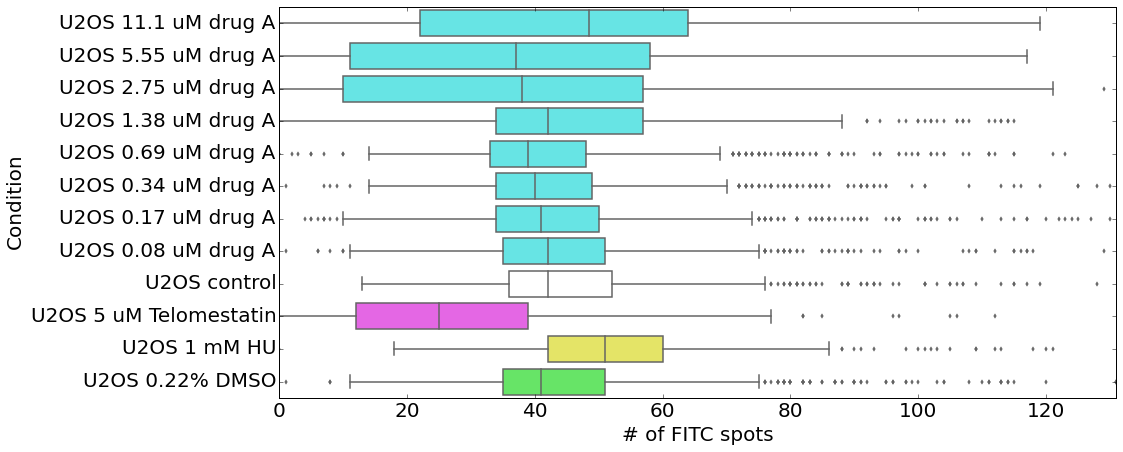

In [67]:
interactive(plot_dist,
            df = fixed(cell_data), 
            base = cell_data.Base.unique().tolist(), 
            parameter = get_params(cell_data))

In [68]:
x = np.random.random([30,20])

In [85]:
plate_data = thread_first('../output/well_summary.csv',
                         pd.read_csv)

In [86]:
plate_data

,Well Name,Condition,Function,# Coloc Spots,# FITCinAPB spots,# TxRed in APB,# of APBs,# of FITC spots,# of TxRed spots,% APB,...,Integrated Intensity_FITC,Integrated Intensity_TxRed,NucArea_Avg,NucIntegrated Intensity_Average,Total_Area_Coloc,Total_Area_FITC,Total_Area_TxRed,Total_Int_Intensity_FITC,Total_Int_Intensity_TxRed,TxRedinAPB_Int_Intensity_Avg
0,A01,U2OS control,25%,4.000000,4.000000,4.000000,2.000000,35.000000,9.000000,4.166667,...,13266.995118,12788.481933,191.281662,11217273.500000,0.685396,9.230374,3.595520,491471.500000,130399.000000,14300.363281
1,A01,U2OS control,50%,6.000000,6.000000,6.000000,4.000000,42.000000,12.000000,6.896552,...,15955.509766,15391.111328,238.023422,13791675.000000,1.078656,11.505664,4.820244,661546.000000,194882.000000,18355.941406
2,A01,U2OS control,75%,9.000000,9.000000,9.000000,6.000000,50.000000,16.000000,10.000000,...,18777.787109,18750.349609,279.371903,18295975.000000,1.685400,15.342758,6.235980,919415.000000,262888.000000,23355.666016
3,A01,U2OS control,count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,301.000000,307.000000,307.000000,307.000000,307.000000,301.000000
4,A01,U2OS control,max,27.000000,26.000000,24.000000,17.000000,113.000000,47.000000,24.242424,...,37555.746094,55527.601563,599.013611,41564444.000000,4.977548,34.112495,15.404556,2683495.000000,2287143.000000,66106.179688
5,A01,U2OS control,mean,7.071661,6.964169,6.644951,4.241042,43.833876,13.071661,7.407418,...,16298.569910,16611.961182,243.298416,14998090.039088,1.259030,12.389904,5.073585,735030.791531,217539.755700,19572.443694
6,A01,U2OS control,min,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,0.000000,...,6692.260742,4438.799805,93.483521,7383899.000000,0.022500,2.730348,0.674160,145988.000000,25784.000000,3529.000000
7,A01,U2OS control,sem,0.223733,0.219414,0.208868,0.159174,0.779592,0.332861,0.256214,...,251.747362,379.362643,4.095907,281720.880319,0.046252,0.258805,0.124384,20051.793736,9297.637069,464.122707
8,A01,U2OS control,std,3.920127,3.844445,3.659663,2.788962,13.659554,5.832191,4.489224,...,4410.970120,6646.970480,71.766086,4936148.590069,0.802443,4.534621,2.179379,351335.808918,162907.761957,8052.228024
9,A02,U2OS 0.22% DMSO,25%,5.000000,5.000000,4.000000,2.000000,35.750000,12.000000,2.555988,...,10898.946778,8304.048096,181.214203,9335660.750000,0.505620,9.331498,3.792150,405359.500000,109056.250000,10405.818359
